## Project Planning Stage (Individual)
**Group: 19**   
**Section: 003**  
**Name: Finn Piney #46957874**  

### Loading Libraries and Datasets

In [34]:
# Loading libraries
library(tidyverse)
library(repr)
library(tidymodels)

# Loading the two datasets directly from their URL's on Github in order to have the full file be reproducible
url_players <- "https://raw.githubusercontent.com/Finnypiney/individual_project_finnp/refs/heads/main/players.csv"
url_sessions <- "https://raw.githubusercontent.com/Finnypiney/individual_project_finnp/refs/heads/main/sessions.csv"

players <- read_csv(url_players)
sessions <- read_csv(url_sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### (1) Data Description (code followed by summary for each dataset)

In [35]:
# PLAYERS SUMMARY STATISTICS
summary_players <- summary(players)

experience_categories <- unique(players$experience)
gender_categories <- unique(players$gender)

summary_players
experience_categories
gender_categories

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"

**Players:** in the players.csv dataset, we have
- 196 rows (196 observations)
- 7 variables
  - experience
    - This is a character variable that has 5 unique categories: 'Pro', 'Amateur', 'Regular, and 'Beginner'. It indicates the level of MineCraft experience an individual player in the dataset has.
  - subscribe
    - This is a logical variable (true or false) that tells you if a player is subscribed to a game-related newsletter
  - hashedEmail
    - This is a character variable that reports a player's hashed email address.
  - played_hours
    - This is a double variable (number with decimal values) that reports the number of MineCraft hours played by each individual.
  - name
    - This is a character variable that reports a player's first name.
  - gender
    - This is a character variable that reports a player's gender (7 unique categories).
  - Age
    - This is a double variable that reports a player's age.

**Issues:**
- In the Age variable, 2 observations are NA's, meaning that when we compute summary statistics/wrangle our data we should be careful to account for this using na.rm = TRUE.

In [36]:
# SESSIONS SUMMARY STATISTICS
summary_sessions <- summary(sessions)
summary_sessions

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

**Sessions:** in the sessions.csv dataset, we have
- 1,535 rows
- 5 variables
  - hashedEmail
    - As before, this is a character variable that reports a player's hashed email address.
  - start_time
    - The time (character variable) of the day a player begins playing on the server.
  - end_time
    - The time (character variable) of the day a player stops playing on the server.
  - original_start_time
    - This is a double variable that reports the same as start_time but in UNIX time (milliseconds)
  - original_end_time
    - This is a double variable that reports the same as end_time but in UNIX time (milliseconds)

**Issues:**
- The rows here are not individual observations, as there are 196 players from players.csv, but 1,535 rows here in sessions.csv.
- There are NA's in our original_end_time variable.

### (2) Questions

**Broad question chosen:** (Question 1) What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  

**Specific question chosen:** Can an individual's age, gender, and experience as a MineCraft player help predict whether or not they are subscribed to a game-related newsletter?  

To answer my question, I will be using the players.csv dataset. It has a separate row for each individual and includes the gender, experience, and subscription (true or false) values for all 196 rows in the dataset. The age variable has two NA's, but by making sure to use na.rm = TRUE to account for these when appropriate, these 4 variables from the player.csv dataset will be all that's necessary to answer my question. Additional data wrangling should not be needed for this question. Further discussion of the methods will be included in part (4) (K-nn classification).



### (3) Exploratory Data Analysis and Visualization

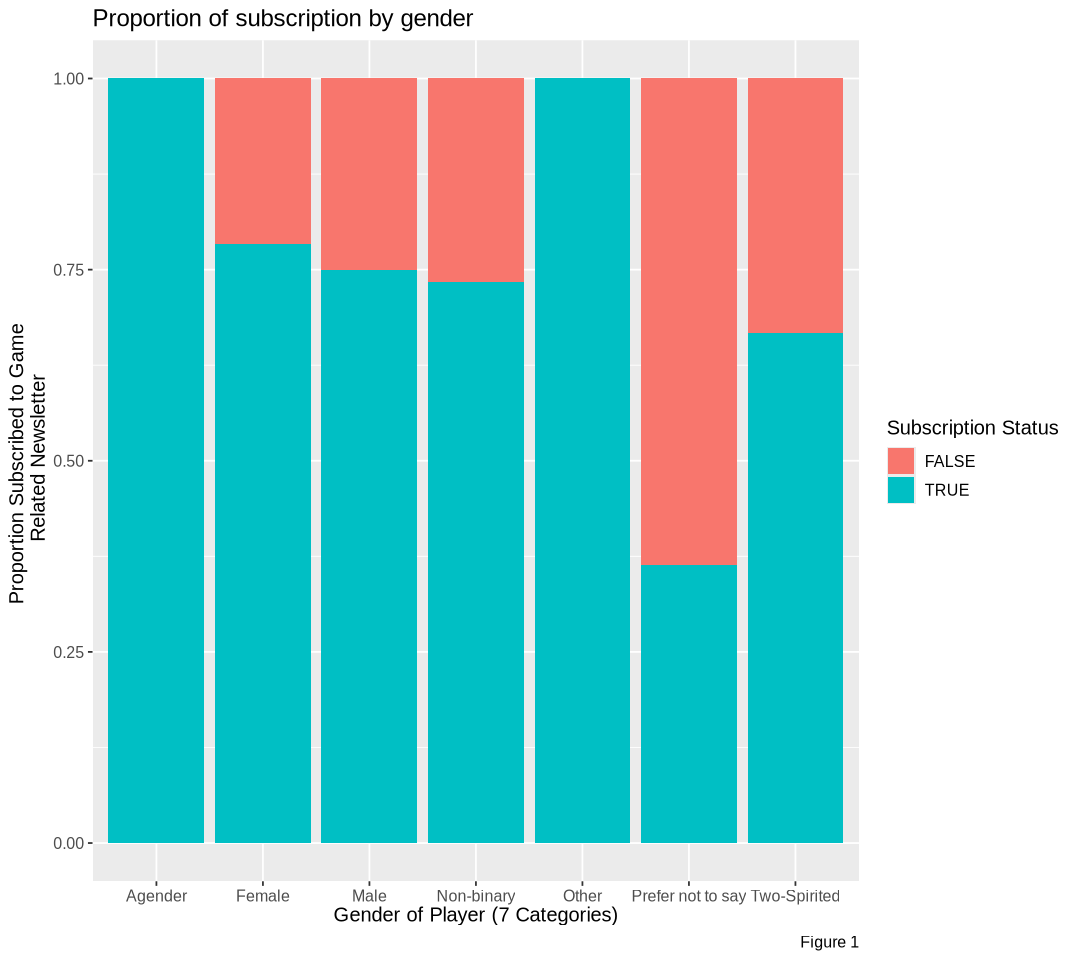

In [42]:
options(repr.plot.width = 9, repr.plot.height = 8)

sub_gender_plot <- ggplot(players, aes(x = gender,fill = subscribe)) +
    geom_bar(position = "fill", na.rm = TRUE) + 
    labs(x = "Gender of Player (7 Categories)", y = "Proportion Subscribed to Game \n Related Newsletter",
        title = "Proportion of subscription by gender", caption = "Figure 1", fill = "Subscription Status") +
    theme(text = element_text(size = 12)) +
    scale_color_brewer(palette = "Set2")

sub_gender_plot


This visualization gives us insight into how the proportion of players subscribed to game-related newsletters differs greatly across gender categories. We can see that the proportion players who self-identified as 'Agender' or 'Other' that are subscribed is very high (100%), while it is lower in other categories. This shows that using including gender as one of our predictors for subscription status may be helpful as differnt groups have very different subscription proportions.